# Trabalho 1

## Regressão Logística

### Ajuste da taxa de aprendizado e número de iterações

A primeira etada é ajustar a taxa de aprendizado e o número de iterações. Após alterar os outros hyperparameters (fator de regularização e grau dos atributos polinimiais) será necessário realizar o ajuste fino, mas será algum valor próximo ao encontrado nesta etapa.

** imports necessários: **

In [1]:
from regressao_logistica_regularizado import RegularizedLogisticRegression
from experimentos import Dataset as DATASET
from experimentos import ModelSelection
from experimentos import Plot
from dataset import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

** varia alpha e número de iterações e plota os gráficos: **

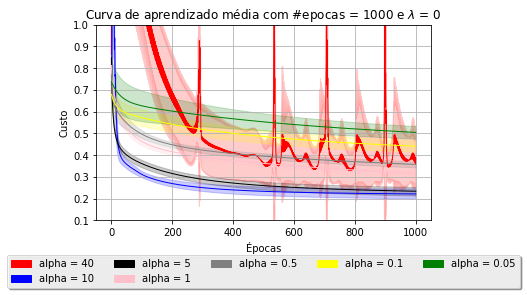

In [2]:
RLR = RegularizedLogisticRegression()
MS = ModelSelection()
DTS = DATASET()
PLT = Plot()

# carrega dataset
X,Y = RLR.load_dataset('datasets/mnist.csv', header=True)

# normaliza
X_ =  DTS.dataset_scaling(X)
alphas = [40, 10, 5, 1, 0.5, 0.1, 0.05]
epochs = [1000]
Lambda = 0
colors = ['red', 'blue', 'black', 'pink', 'gray', 'yellow', 'green']
fold = 1
errors = {}
val_errors = {}
loss = {}
for train,val in MS.k_fold(X_, k=5, shuffle=True):
    fig, ax = plt.subplots()
    errors[str(fold)] = []
    val_errors[str(fold)] = []
    loss[str(fold)] = []
    for e in epochs:
        legends = []
        for i,a in enumerate(alphas):
            # ajusta o modelo
            RLR.fit(X_[train], Y[train], X_[val], Y[val], epochs=e, learning_rate=a, Lambda=Lambda, print_results=False)
            
            # calcula o erro no treino
            errors[str(fold)].append(RLR.train_error)
            # calcula o erro no teste
            val_errors[str(fold)].append(RLR.val_error)
            # salva loss
            loss[str(fold)].append(RLR.loss)
            
            ax.plot(range(e+1), RLR.loss, color=colors[i], linewidth=1)
            legends.append(mpatches.Patch(color=colors[i], label='alpha = ' + str(a)))
        title = u'Curva de aprendizado com #epocas = ' + str(e) + ' e $\lambda$ = ' + str(Lambda) + ' (fold ' + str(fold) + ')'
        plt.ylim([0.1, 1])
        plt.xlabel(u'Épocas')
        plt.ylabel(u'Custo')
        
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.1,
        box.width, box.height * 0.9])
        ax.legend(handles=legends[:], loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
        plt.title(title)
        plt.grid(True)
    
        fig.savefig('fold' + str(fold) + '.eps')
        plt.close(fig)
        
        #plt.show()
        
        fold += 1
        
error = []        
val_error = []
loss_ = []
for k in ['1', '2', '3', '4','5']:
    error.append(errors[k])
    val_error.append(val_errors[k])
    loss_.append(loss[k])
    
fig, ax = plt.subplots()
for i,a in enumerate(alphas):
    mean = np.asarray(loss_).mean(axis=0)[i]
    stdeviation = np.asarray(loss_).std(axis=0)[i]
    ax.plot(range(epochs[0]+1), mean, color=colors[i], linewidth=1)
    ax.fill_between(range(epochs[0]+1), mean-stdeviation, mean+stdeviation , color=colors[i], linewidth=1, alpha=0.2)
    
title = u'Curva de aprendizado média com #epocas = ' + str(e) + ' e $\lambda$ = ' + str(Lambda)
plt.ylim([0.1, 1])
plt.xlabel(u'Épocas')
plt.ylabel(u'Custo')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
box.width, box.height * 0.9])
lgd = ax.legend(handles=legends[:], loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
plt.title(title)
plt.grid(True)

fig.savefig('media_std.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [ ]:
for i in range(len(alphas)):
    plt.plot(range(epochs[0]+1), np.asarray(error).mean(axis=0)[i], color=colors[i], linewidth=1)
    #legends.append(mpatches.Patch(color=colors[i], label='alpha = ' + str(a)))
title = 'erro no treino'
plt.ylim([0.05, 0.6])
plt.xlabel('epocas')
plt.ylabel('erro')
plt.legend(handles=legends[:], loc='upper right')
plt.title(title)
plt.grid(True)

plt.savefig('erro_treino.eps')
plt.show()


In [ ]:
for i in range(len(alphas)):
    plt.plot(range(epochs[0]+1), np.asarray(val_error).mean(axis=0)[i], color=colors[i], linewidth=1)
    #legends.append(mpatches.Patch(color=colors[i], label='alpha = ' + str(a)))
title = 'erro na validacao'
plt.ylim([0.05, 0.6])
plt.xlabel('epocas')
plt.ylabel('erro')
plt.legend(handles=legends[:], loc='upper right')
plt.title(title)
plt.grid(True)

plt.savefig('erro_validacao.eps')
plt.show()

In [ ]:
# cada linha é um alpha, cada coluna uma época e cada valor é um erro binário médio dos k-folds
#print "erro medio no treino ", np.asarray(error).mean(axis=0).shape
#print "desvio padrao no treino ", np.asarray(error).std(axis=0)
#print "erro medio na validacao ", np.asarray(val_error).mean(axis=0).shape
#print "desvio padrao na validacao ", np.asarray(val_error).std(axis=0)

for i,a in enumerate(alphas):
    print "alpha = ", a
    print "erro medio final no treino ", np.asarray(error).mean(axis=0)[i][-1]
    print "desvio padrao final no treino ", np.asarray(error).std(axis=0)[i][-1]
    print "erro medio final na validacao ", np.asarray(val_error).mean(axis=0)[i][-1]
    print "desvio padrao final na validacao ", np.asarray(val_error).std(axis=0)[i][-1]
    print "\n"